In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [2]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\vdalal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv("./Housing.csv")
data

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75383,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,1,229,30,1,1991,6,63,35000
75384,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,2,331,30,1,1991,6,64,50000
75385,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,3,331,5,6,2016,0,2,9999999
75386,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,4,157,64,1,1957,6,63,1700


In [3]:
# Considering only elder person as household owner
df = data.sort_values(['SERIAL', 'AGE'], ascending=[True, False]).drop_duplicates('SERIAL')
df.shape

(30802, 24)

In [4]:
df.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
df_final = df.drop(['SERIAL','OWNERSHPD','BIRTHYR', 'VALUEH','EDUC', 'EDUCD','BIRTHYR','PERWT','PERNUM'],axis = 1)
df_final

,DENSITY,OWNERSHP,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,ROOMS,BUILTYR2,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,MARST,INCTOT
0,920.0,1,9990,9993,360,9993,75000,7,7,4,2,1,0,52,6,75000
1,3640.9,2,1080,9993,1800,9993,13600,6,4,4,2,2,0,22,6,5600
3,22.5,1,600,9993,9993,9993,7000,5,5,4,2,1,0,62,4,7000
4,3710.4,2,3600,9993,9997,9993,50500,4,6,3,2,1,0,50,3,16000
7,448.2,1,1560,3000,9993,9993,155300,5,6,4,2,1,1,93,1,89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75373,362.4,1,1200,9993,500,9993,106000,7,6,4,3,1,0,51,4,20000
75375,667.7,1,600,1200,750,9993,121500,6,7,4,1,1,1,65,1,100000
75378,2425.1,1,2400,600,1400,9993,201800,8,7,5,3,1,1,70,1,149000
75382,2295.9,1,1200,9992,1600,9993,75500,6,15,4,2,1,1,70,1,9600


In [6]:
df_final = df_final[~df_final['ROOMS'].isin([00])]
df_final = df_final[~df_final['BUILTYR2'].isin([00])]
df_final = df_final[~df_final['BEDROOMS'].isin([00])]
df_final = df_final[~df_final['VEHICLES'].isin([0,])]
df_final = df_final[~df_final['AGE'].isin([999])]
df_final = df_final[~df_final['MARST'].isin([9])]

In [7]:
marital_mapping = {
    1: 'Married',  # Married, spouse present
    2: 'Married',  # Married, spouse absent
    3: 'Separated/Divorced',  # Separated
    4: 'Separated/Divorced',  # Divorced
    5: 'Single',  # Widowed
    6: 'Single'  # Never married/single
}
# Apply the mapping to create a new categorical column
df_final['MARST'] = df_final['MARST'].map(marital_mapping)
df_final = pd.get_dummies(df_final, columns=['MARST'])
df_final.columns
df_final


,DENSITY,OWNERSHP,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,ROOMS,BUILTYR2,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,INCTOT,MARST_Married,MARST_Separated/Divorced,MARST_Single
0,920.0,1,9990,9993,360,9993,75000,7,7,4,2,1,0,52,75000,0,0,1
1,3640.9,2,1080,9993,1800,9993,13600,6,4,4,2,2,0,22,5600,0,0,1
3,22.5,1,600,9993,9993,9993,7000,5,5,4,2,1,0,62,7000,0,1,0
4,3710.4,2,3600,9993,9997,9993,50500,4,6,3,2,1,0,50,16000,0,1,0
7,448.2,1,1560,3000,9993,9993,155300,5,6,4,2,1,1,93,89800,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75373,362.4,1,1200,9993,500,9993,106000,7,6,4,3,1,0,51,20000,0,1,0
75375,667.7,1,600,1200,750,9993,121500,6,7,4,1,1,1,65,100000,1,0,0
75378,2425.1,1,2400,600,1400,9993,201800,8,7,5,3,1,1,70,149000,1,0,0
75382,2295.9,1,1200,9992,1600,9993,75500,6,15,4,2,1,1,70,9600,1,0,0


In [8]:
# Split features and target
X = df_final.drop("OWNERSHP", axis=1)  # All features except target
y = df_final["OWNERSHP"]  # Target variable["OWNERSHP"]  # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  # Transform on the test set


In [12]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(verbose=True), param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:", best_params)

# Evaluate the best model on the testing data
accuracy = best_estimator.score(X_test_scaled, y_test)
print("Accuracy with the best model: %.2f%%" % (accuracy * 100))


[LibSVM]Best parameters: {'C': 1, 'kernel': 'linear'}
Accuracy with the best model: 85.07%


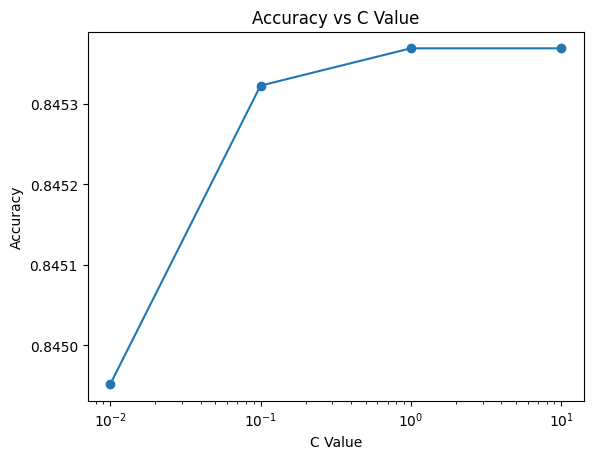

In [13]:
results = grid_search.cv_results_

# Get the unique C values
C_values = param_grid['C']

# Extract the mean test scores for the different C values
mean_test_scores = results['mean_test_score']

# Find indices for the linear kernel and varying C values
C_indices = [i for i, param in enumerate(results['params']) if param['kernel'] == 'linear']

# Get the mean scores corresponding to these indices
C_mean_scores = [mean_test_scores[i] for i in C_indices]

# Plot C values versus accuracy
plt.plot(C_values, C_mean_scores, marker='o', linestyle='-', label='Accuracy')

# Label the axes and title
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C Value')
plt.xscale('log')  # Optional, to better visualize a range of C values
plt.show()

In [14]:
best_svm = grid_search.best_estimator_

# Calculate permutation feature importance
permutation_results = permutation_importance(best_svm, X_train_scaled, y_train, n_repeats=10, random_state=42)
importance_means = permutation_results.importances_mean  # Average importance over all repeats

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame(
    {"feature": X.columns, "importance": importance_means}
).sort_values(by="importance", ascending=False)

feature_importance_df

,feature,importance
8,BEDROOMS,0.038032
12,AGE,0.036598
3,COSTWATR,0.023876
6,ROOMS,0.010069
0,DENSITY,0.009387
5,HHINCOME,0.005055
2,COSTGAS,0.004930
4,COSTFUEL,0.003692
10,NFAMS,0.002778
13,INCTOT,0.002583


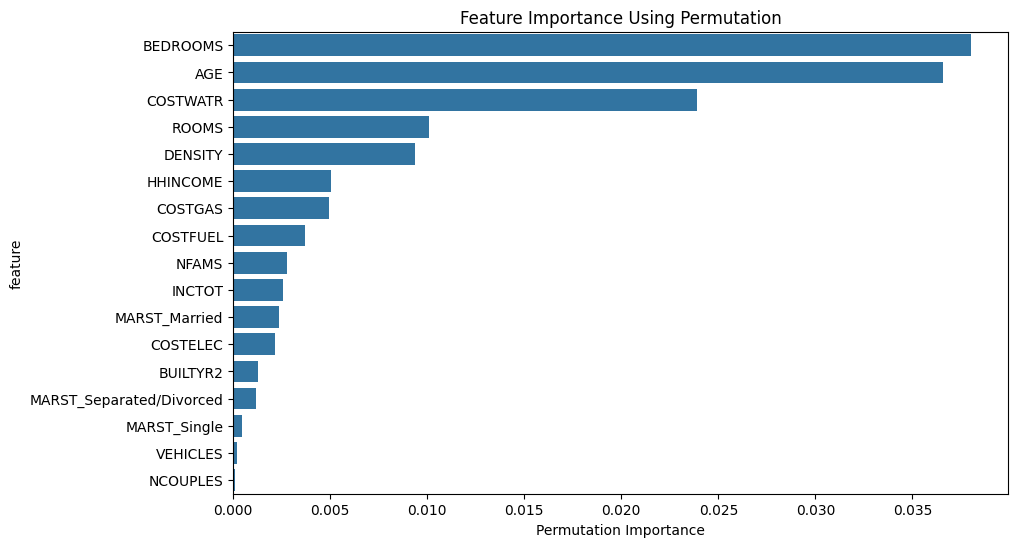

In [15]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance_df)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance Using Permutation")
plt.show()

Top 5 features from permutation importance: ['BEDROOMS', 'AGE', 'COSTWATR', 'ROOMS', 'DENSITY', 'HHINCOME', 'COSTGAS']
Accuracy with top 5 features: 84.04%


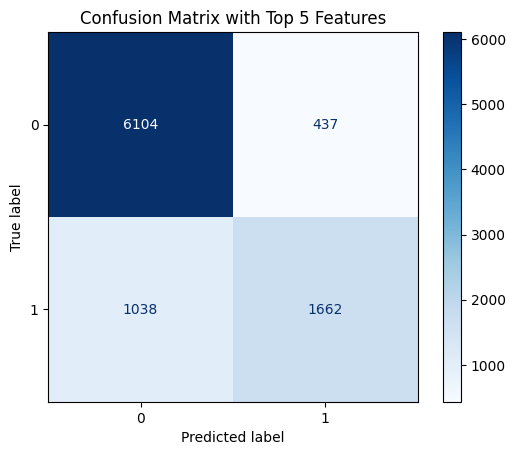

In [16]:
top_5_features = feature_importance_df["feature"].head(7).tolist()

print("Top 5 features from permutation importance:", top_5_features)

# Filter the dataset to include only the top 5 features
X_top5 = X[top_5_features]

# Split the new dataset into training and testing sets
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(
    X_top5, y, test_size=0.3, random_state=42)

# Scale the new dataset
scaler_top5 = StandardScaler()
X_train_top5_scaled = scaler_top5.fit_transform(X_train_top5)
X_test_top5_scaled = scaler_top5.transform(X_test_top5)

# Train an SVM model with the top 5 features
svm_top5 = SVC(kernel='linear', C=1, random_state=42)  # Adjust C and other parameters as needed
svm_top5.fit(X_train_top5_scaled, y_train_top5)

# Calculate accuracy
accuracy_top5 = accuracy_score(y_test_top5, svm_top5.predict(X_test_top5_scaled))
print(f"Accuracy with top 5 features: {accuracy_top5 * 100:.2f}%")

# Confusion Matrix for the model with top 5 features
conf_matrix_top5 = confusion_matrix(y_test_top5, svm_top5.predict(X_test_top5_scaled))
disp_top5 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top5)
disp_top5.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 5 Features")
plt.show()

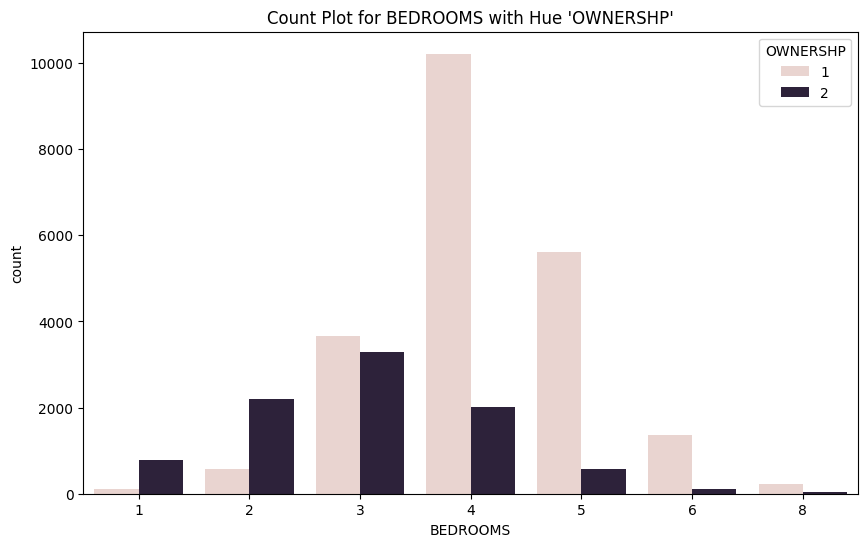

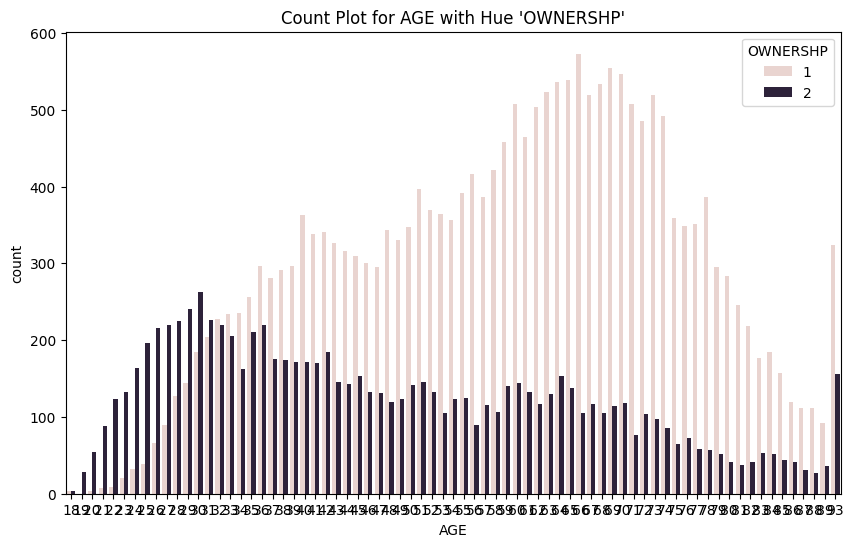

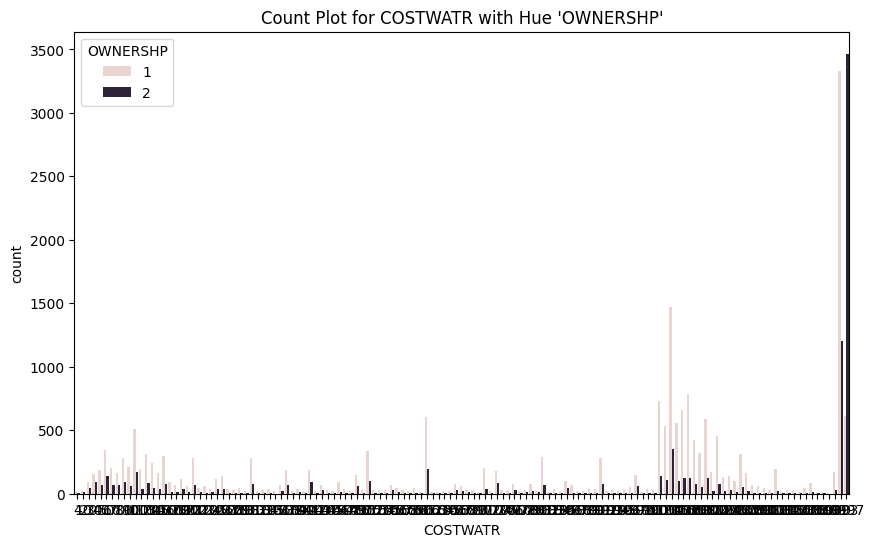

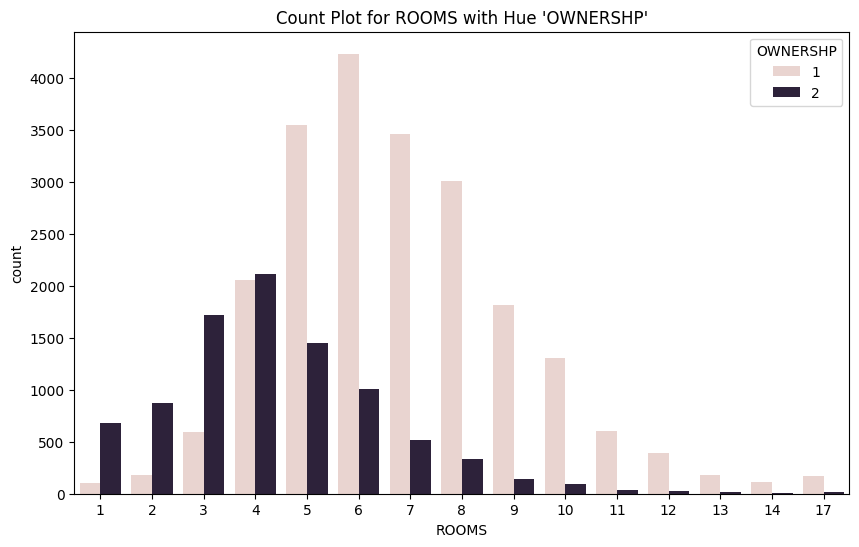

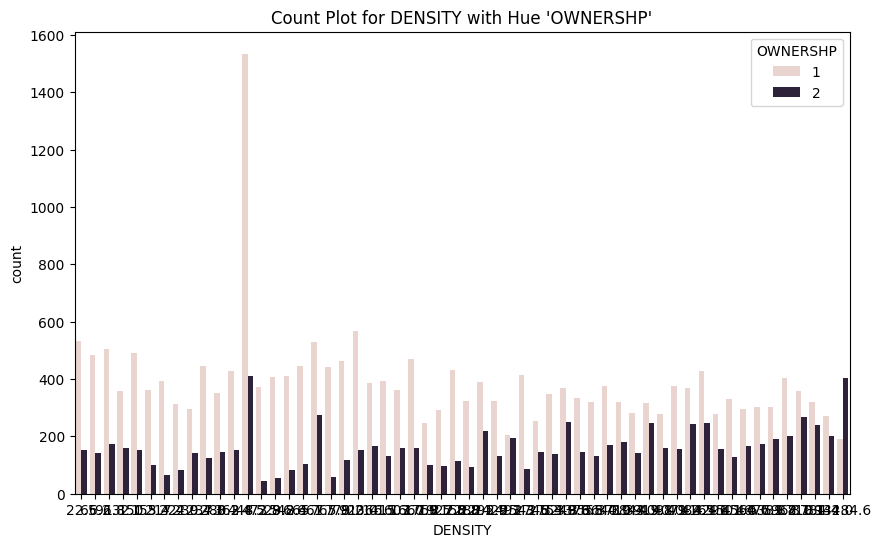

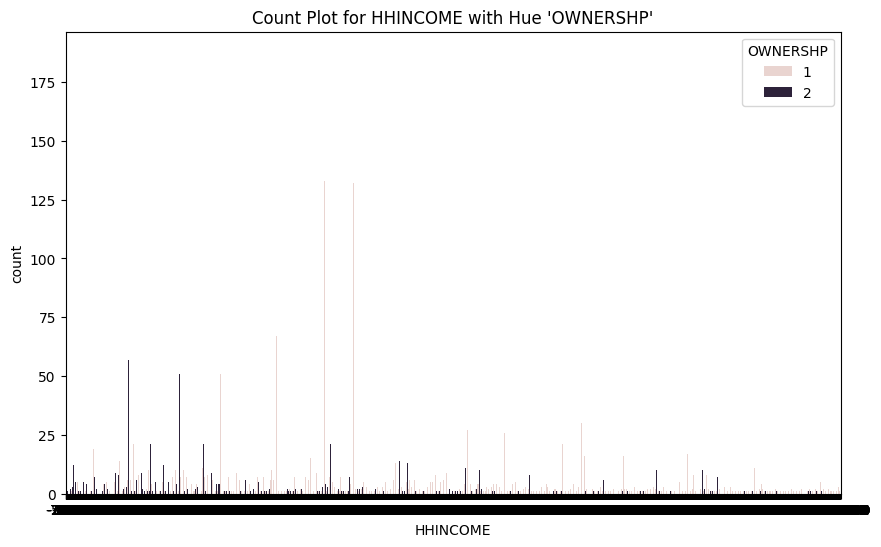

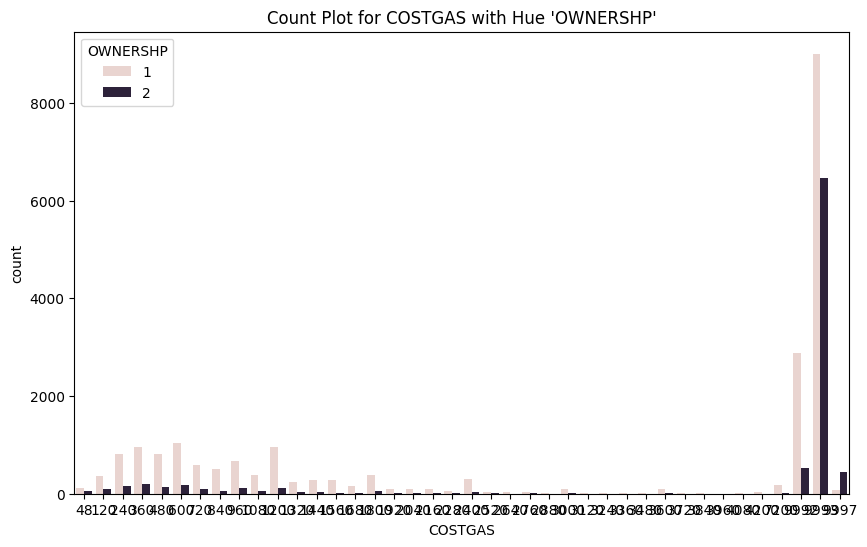

In [17]:
for var in top_5_features:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.countplot(x=var, hue='OWNERSHP', data=df_final)  # Use 'OWNERSHP' for the hue
    plt.title(f"Count Plot for {var} with Hue 'OWNERSHP'")  # Title indicating the variable
    plt.show()  # Display the plot


Top 2 features from permutation importance: ['BEDROOMS', 'AGE']
Accuracy with top 2 features: 81.19%


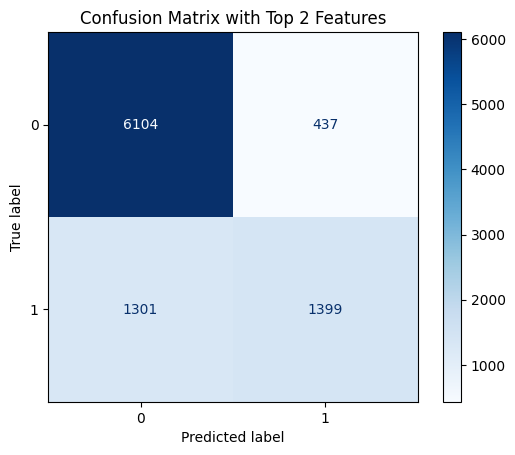

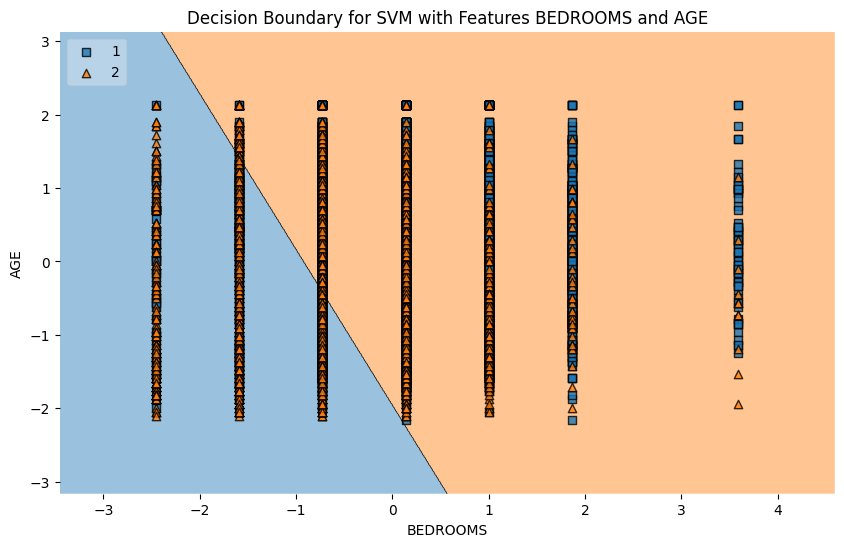

In [18]:
top_2_features = feature_importance_df["feature"].head(2).tolist()

print("Top 2 features from permutation importance:", top_2_features)

# Filter the dataset to include only the top 5 features
X_top2 = X[top_2_features]

# Split the new dataset into training and testing sets
X_train_top2, X_test_top2, y_train_top2, y_test_top2 = train_test_split(
    X_top2, y, test_size=0.3, random_state=42)

# Scale the new dataset
scaler_top2 = StandardScaler()
X_train_top2_scaled = scaler_top5.fit_transform(X_train_top2)
X_test_top2_scaled = scaler_top5.transform(X_test_top2)

# Train an SVM model with the top 5 features
svm_top2 = SVC(kernel='linear', C=1, random_state=42)  # Adjust C and other parameters as needed
svm_top2.fit(X_train_top2_scaled, y_train_top2)

# Calculate accuracy
accuracy_top2 = accuracy_score(y_test_top2, svm_top2.predict(X_test_top2_scaled))
print(f"Accuracy with top 2 features: {accuracy_top2 * 100:.2f}%")

# Confusion Matrix for the model with top 2 features
conf_matrix_top2 = confusion_matrix(y_test_top2, svm_top2.predict(X_test_top2_scaled))
disp_top5 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top2)
disp_top5.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 2 Features")
plt.show()

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_top2_scaled, y_test_top2.to_numpy(), clf=svm_top2, legend=2)
plt.xlabel(top_2_features[0])  
plt.ylabel(top_2_features[1]) 
plt.title(f"Decision Boundary for SVM with Features {top_2_features[0]} and {top_2_features[1]}")
plt.show()


## Radial kernel:

In [31]:
# New parameter grid for RBF kernel with different gamma values
param_grid_rbf = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}

# Initialize GridSearchCV with RBF kernel
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', verbose=True), param_grid_rbf, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search_rbf.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params_rbf = grid_search_rbf.best_params_
best_estimator_rbf = grid_search_rbf.best_estimator_

print("Best parameters for RBF kernel:", best_params_rbf)

# Evaluate the best RBF model on the test set
accuracy_rbf = best_estimator_rbf.score(X_test_scaled, y_test)
print(f"Accuracy with the best RBF model: {accuracy_rbf * 100:.2f}%")

[LibSVM]Best parameters for RBF kernel: {'C': 1, 'gamma': 0.1}
Accuracy with the best RBF model: 85.59%


In [ ]:
# Calculate permutation feature importance for the best RBF model
permutation_results_rbf = permutation_importance(
    best_estimator_rbf, X_train_scaled, y_train, n_repeats=10, random_state=42
)
importance_means_rbf = permutation_results_rbf.importances_mean

# Create a DataFrame for feature importance
feature_importance_df_rbf = pd.DataFrame(
    {"feature": X.columns, "importance": importance_means_rbf}
).sort_values(by="importance", ascending=False)

# Plot the feature importance for the RBF model
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance_df_rbf, color="skyblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance Using Permutation (RBF)")
plt.show()

# Get the top 5 features from the RBF model's permutation importance
top_5_features_rbf = feature_importance_df_rbf["feature"].head(5).tolist()
print("Top 5 features from permutation importance (RBF):", top_5_features_rbf)

In [ ]:
# Filter the dataset to include only the top 5 features
X_top5_rbf = X[top_5_features_rbf]

# Split and scale the data with top 5 features
X_train_top5_rbf, X_test_top5_rbf, y_train_top5_rbf, y_test_top5_rbf = train_test_split(
    X_top5_rbf, y, test_size=0.3, random_state=42
)

scaler_top5_rbf = StandardScaler()
X_train_top5_rbf_scaled = scaler_top5_rbf.fit_transform(X_train_top5_rbf)
X_test_top5_rbf_scaled = scaler_top5_rbf.transform(X_test_top5_rbf)

# Train an SVM with RBF kernel using the top 5 features
svm_top5_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # Adjust parameters as needed
svm_top5_rbf.fit(X_train_top5_rbf_scaled, y_train_top5_rbf)

# Calculate accuracy for the RBF model with top 5 features
accuracy_top5_rbf = accuracy_score(y_test_top5_rbf, svm_top5_rbf.predict(X_test_top5_rbf_scaled))
print(f"Accuracy with top 5 features (RBF): {accuracy_top5_rbf * 100:.2f}%")

# Plot confusion matrix for the RBF model with top 5 features
conf_matrix_top5_rbf = confusion_matrix(y_test_top5_rbf, svm_top5_rbf.predict(X_test_top5_rbf_scaled))
disp_top5_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top5_rbf)
disp_top5_rbf.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 5 Features (RBF)")
plt.show()

# Assuming 'df_final' contains your dataset with 'OWNERSHP'
# Plot count plots for the top 5 features with hue 'OWNERSHP'
for var in top_5_features_rbf:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='OWNERSHP', data=df_final)  # Ensure 'df_final' has the expected structure
    plt.title(f"Count Plot for {var} with Hue 'OWNERSHP'") 
    plt.show()


In [ ]:
# Filter the dataset to include only the top 5 features
top_2_features_rbf = feature_importance_df_rbf["feature"].head(2).tolist()

print("Top 2 features from permutation importance:", top_2_features_rbf)

X_top2_rbf = X[top_2_features_rbf]

# Split and scale the data with top 5 features
X_train_top2_rbf, X_test_top2_rbf, y_train_top2_rbf, y_test_top2_rbf = train_test_split(
    X_top2_rbf, y, test_size=0.3, random_state=42
)

scaler_top2_rbf = StandardScaler()
X_train_top2_rbf_scaled = scaler_top2_rbf.fit_transform(X_train_top2_rbf)
X_test_top2_rbf_scaled = scaler_top2_rbf.transform(X_test_top2_rbf)

# Train an SVM with RBF kernel using the top 2 features
svm_top2_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # Adjust parameters as needed
svm_top2_rbf.fit(X_train_top2_rbf_scaled, y_train_top2_rbf)

# Calculate accuracy for the RBF model with top 2 features
accuracy_top2_rbf = accuracy_score(y_test_top2_rbf, svm_top2_rbf.predict(X_test_top2_rbf_scaled))
print(f"Accuracy with top 5 features (RBF): {accuracy_top2_rbf * 100:.2f}%")

# Plot confusion matrix for the RBF model with top 2 features
conf_matrix_top2_rbf = confusion_matrix(y_test_top2_rbf, svm_top2_rbf.predict(X_test_top2_rbf_scaled))
disp_top2_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top2_rbf)
disp_top2_rbf.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 5 Features (RBF)")
plt.show()

# Assuming 'df_final' contains your dataset with 'OWNERSHP'
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_top2_rbf_scaled, y_test_top2_rbf.to_numpy(), clf=svm_top2, legend=2)
plt.xlabel(top_2_features_rbf[0])  
plt.ylabel(top_2_features_rbf[1]) 
plt.title(f"Decision Boundary for SVM with Features {top_2_features_rbf[0]} and {top_2_features_rbf[1]}")
plt.show()


## Polynomial Kernel

[LibSVM]Best parameters for polynomial kernel: {'C': 1, 'degree': 3}
Accuracy with the best polynomial model: 84.98%


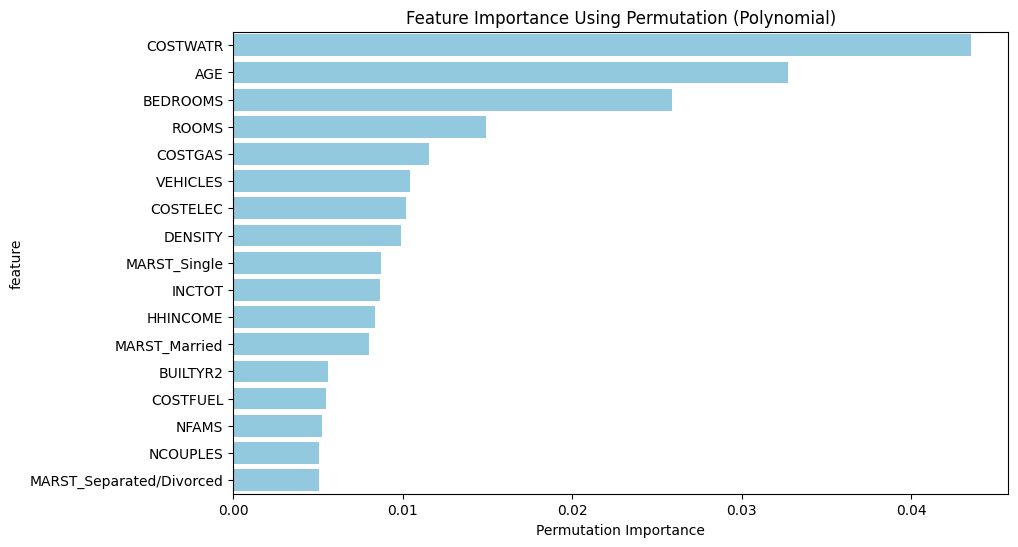

In [10]:
param_grid_poly = {
    'C': [0.01, 0.1, 1, 10], 
    'degree': [2, 3, 4, 5]  # Polynomial degrees to test
}

# Initialize GridSearchCV with polynomial kernel
grid_search_poly = GridSearchCV(SVC(kernel='poly', shrinking=False,verbose=True), param_grid_poly, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search_poly.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params_poly = grid_search_poly.best_params_
best_estimator_poly = grid_search_poly.best_estimator_

print("Best parameters for polynomial kernel:", best_params_poly)

# Evaluate the best polynomial model on the test set
accuracy_poly = best_estimator_poly.score(X_test_scaled, y_test)
print(f"Accuracy with the best polynomial model: {accuracy_poly * 100:.2f}%")

# Calculate permutation feature importance for the best polynomial model
permutation_results_poly = permutation_importance(
    best_estimator_poly, X_train_scaled, y_train, n_repeats=10, random_state=42
)
importance_means_poly = permutation_results_poly.importances_mean

# Create a DataFrame for feature importance
feature_importance_df_poly = pd.DataFrame(
    {"feature": X.columns, "importance": importance_means_poly}
).sort_values(by="importance", ascending=False)

# Plot the feature importance for the polynomial model
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance_df_poly, color="skyblue")
plt.xlabel("Permutation Importance")
plt.title("Feature Importance Using Permutation (Polynomial)")
plt.show()



In [ ]:
# Get the top 2 features from the polynomial model's permutation importance
top_5_features_poly = feature_importance_df_poly["feature"].head(5).tolist()

print("Top 5 features from permutation importance (Polynomial):", top_5_features_poly)

# Filter the dataset to include only the top 2 features
X_top5_poly = X[top_5_features_poly]

# Split and scale the data with top 2 features
X_train_top5_poly, X_test_top5_poly, y_train_top5_poly, y_test_top5_poly = train_test_split(
    X_top5_poly, y, test_size=0.3, random_state=42
)

scaler_top5_poly = StandardScaler()
X_train_top5_poly_scaled = scaler_top5_poly.fit_transform(X_train_top5_poly)
X_test_top5_poly_scaled = scaler_top5_poly.transform(X_test_top5_poly)

# Train an SVM with a polynomial kernel using the top 2 features
svm_top5_poly = SVC(kernel='poly', C=1, gamma='scale', degree=best_params_poly['degree'], random_state=42)  # Adjust parameters as needed
svm_top5_poly.fit(X_train_top5_poly_scaled, y_train_top5_poly)

# Calculate accuracy for the polynomial model with top 2 features
accuracy_top5_poly = accuracy_score(y_test_top5_poly, svm_top5_poly.predict(X_test_top5_poly_scaled))
print(f"Accuracy with top 5 features (Polynomial): {accuracy_top5_poly * 100:.2f}%")

# Plot confusion matrix for the polynomial model with top 5 features
conf_matrix_top5_poly = confusion_matrix(y_test_top5_poly, svm_top5_poly.predict(X_test_top5_poly_scaled))
disp_top5_poly = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top5_poly)
disp_top5_poly.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 5 Features (Polynomial)")
plt.show()

# Plot decision boundary for the polynomial model with top 2 features
for var in top_5_features_poly:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='OWNERSHP', data=df_final)  # Ensure 'df_final' has the expected structure
    plt.title(f"Count Plot for {var} with Hue 'OWNERSHP'") 
    plt.show()


In [ ]:
# Get the top 2 features from the polynomial model's permutation importance
top_2_features_poly = feature_importance_df_poly["feature"].head(2).tolist()

print("Top 2 features from permutation importance (Polynomial):", top_2_features_poly)

# Filter the dataset to include only the top 2 features
X_top2_poly = X[top_2_features_poly]

# Split and scale the data with top 2 features
X_train_top2_poly, X_test_top2_poly, y_train_top2_poly, y_test_top2_poly = train_test_split(
    X_top2_poly, y, test_size=0.3, random_state=42
)

scaler_top2_poly = StandardScaler()
X_train_top2_poly_scaled = scaler_top2_poly.fit_transform(X_train_top2_poly)
X_test_top2_poly_scaled = scaler_top2_poly.transform(X_test_top2_poly)

# Train an SVM with a polynomial kernel using the top 2 features
svm_top2_poly = SVC(kernel='poly', C=1, gamma='scale', degree=best_params_poly['degree'], random_state=42)  # Adjust parameters as needed
svm_top2_poly.fit(X_train_top2_poly_scaled, y_train_top2_poly)

# Calculate accuracy for the polynomial model with top 2 features
accuracy_top2_poly = accuracy_score(y_test_top2_poly, svm_top2_poly.predict(X_test_top2_poly_scaled))
print(f"Accuracy with top 2 features (Polynomial): {accuracy_top2_poly * 100:.2f}%")

# Plot confusion matrix for the polynomial model with top 2 features
conf_matrix_top2_poly = confusion_matrix(y_test_top2_poly, svm_top2_poly.predict(X_test_top2_poly_scaled))
disp_top2_poly = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top2_poly)
disp_top2_poly.plot(cmap='Blues')
plt.title("Confusion Matrix with Top 2 Features (Polynomial)")
plt.show()

# Plot decision boundary for the polynomial model with top 2 features
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_top2_poly_scaled, y_test_top2_poly.to_numpy(), clf=svm_top2_poly, legend=2)
plt.xlabel(top_2_features_poly[0])  
plt.ylabel(top_2_features_poly[1]) 
plt.title(f"Decision Boundary for SVM with Features {top_2_features_poly[0]} and {top_2_features_poly[1]} (Polynomial)")
plt.show()
